In [2]:
import pandas as pd

y_train = pd.read_csv("/mnt/c/Users/zer0nu11/Documents/workspace/projects/MatModSchool/target_test_small.csv")
X_train = pd.read_csv("/mnt/c/Users/zer0nu11/Documents/workspace/projects/MatModSchool/data_test_small.csv")

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39943 entries, 0 to 39942
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      39943 non-null  object 
 1   telemetry_0   39942 non-null  float64
 2   telemetry_1   39942 non-null  float64
 3   telemetry_2   39942 non-null  float64
 4   telemetry_3   39942 non-null  float64
 5   telemetry_4   39942 non-null  float64
 6   telemetry_5   39942 non-null  float64
 7   telemetry_6   39942 non-null  float64
 8   telemetry_7   39942 non-null  float64
 9   telemetry_8   39942 non-null  float64
 10  telemetry_9   39942 non-null  float64
 11  telemetry_10  39942 non-null  float64
 12  telemetry_11  39942 non-null  float64
 13  telemetry_12  318 non-null    float64
 14  telemetry_13  318 non-null    float64
 15  telemetry_14  318 non-null    float64
 16  telemetry_15  318 non-null    float64
dtypes: float64(16), object(1)
memory usage: 5.2+ MB


In [3]:
X_train = X_train.rename(columns={'telemetry_0': 'temp4', 
                        'telemetry_1': 'consumption',
                        'telemetry_2': 'temp1', 
                        'telemetry_3': 'ampere_add',
                        'telemetry_4': 'press_add', 
                        'telemetry_5': 'temp3',
                        'telemetry_6': 'speed', 
                        'telemetry_7': 'press1',
                        'telemetry_8': 'press2', 
                        'telemetry_9': 'temp2',
                        'telemetry_10': 'temp5', 
                        'telemetry_11': 'temp6',
                        'telemetry_12': 'item1', 
                        'telemetry_13': 'item2',
                        'telemetry_14': 'item3', 
                        'telemetry_15': 'item4',})

y_train = y_train.rename(columns={'Дата': 'datetime'})

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39943 entries, 0 to 39942
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     39943 non-null  object 
 1   temp4        39942 non-null  float64
 2   consumption  39942 non-null  float64
 3   temp1        39942 non-null  float64
 4   ampere_add   39942 non-null  float64
 5   press_add    39942 non-null  float64
 6   temp3        39942 non-null  float64
 7   speed        39942 non-null  float64
 8   press1       39942 non-null  float64
 9   press2       39942 non-null  float64
 10  temp2        39942 non-null  float64
 11  temp5        39942 non-null  float64
 12  temp6        39942 non-null  float64
 13  item1        318 non-null    float64
 14  item2        318 non-null    float64
 15  item3        318 non-null    float64
 16  item4        318 non-null    float64
dtypes: float64(16), object(1)
memory usage: 5.2+ MB


In [5]:
X_train['datetime'] = pd.to_datetime(X_train['datetime'])
y_train['datetime'] = pd.to_datetime(y_train['datetime'])

In [6]:
import numpy as np

X_train = X_train.drop(X_train[X_train['datetime'] < y_train['datetime'][0]].index)
X_train = X_train.drop(X_train[X_train["datetime"] > y_train['datetime'].iloc[-1]].index)
X_train.head()

X_train = X_train.fillna(X_train.iloc[:, X_train.columns.get_loc('datetime')+1:].mean())
X_train = X_train.drop(X_train[X_train.duplicated()].index)
y_train = y_train.drop(y_train[y_train.duplicated()].index)

X_train = X_train[X_train['datetime'].isin(y_train['datetime'])]

In [7]:
import seaborn as sns

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

data = X_train.merge(y_train, on='datetime', how='inner')


<Axes: >

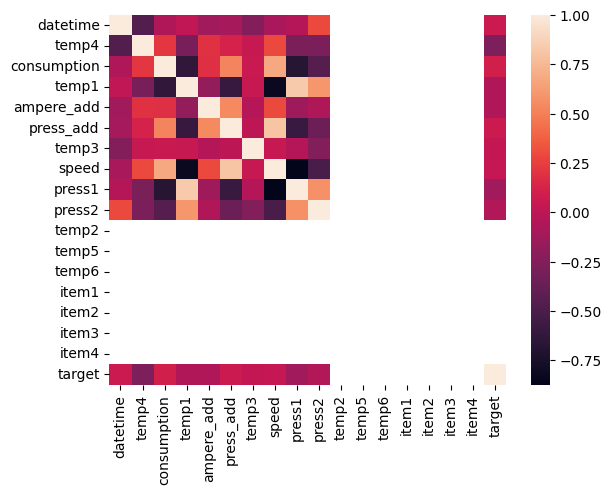

In [8]:
correlations = data.corr()
sns.heatmap(correlations)

<Axes: xlabel='target', ylabel='datetime'>

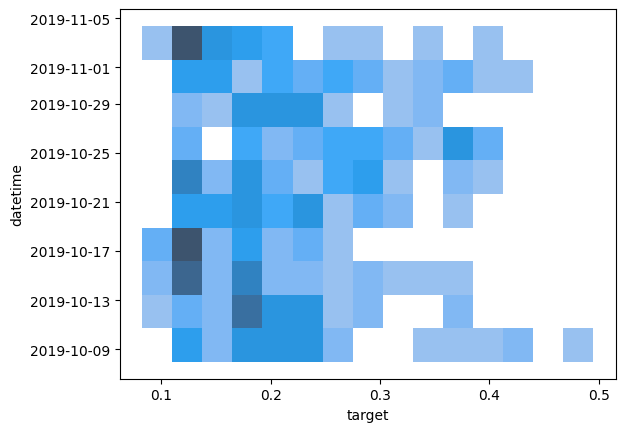

In [9]:
sns.histplot(x=y_train['target'], y=y_train['datetime'])

<Axes: xlabel='target', ylabel='datetime'>

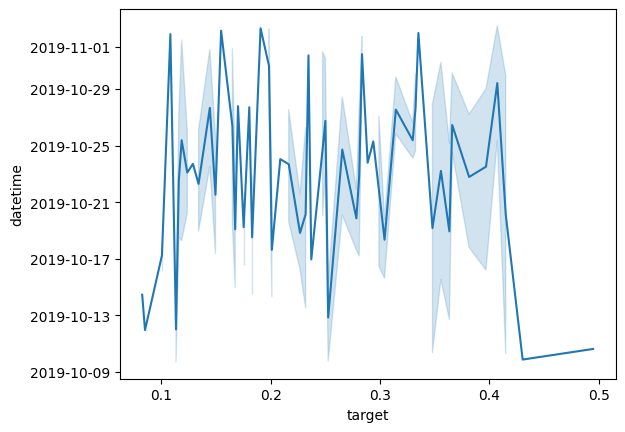

In [10]:
sns.lineplot(x=y_train['target'], y=y_train['datetime'])

In [12]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, : data.columns.get_loc('target')], data[['datetime', 'target']], test_size=0.2, random_state=10)

In [15]:
from sklearn.linear_model import LinearRegression

# y_train['datetime'] = pd.to_datetime(y_train['datetime'])
y_train['datetime'] = y_train['datetime'].astype(int)

# X_train['datetime'] = pd.to_datetime(X_train['datetime'])
X_train['datetime'] = X_train['datetime'].astype(int)
X_test['datetime'] = X_test['datetime'].astype(int)

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_train, y_train)

model.predict(X_test)

[[1.57095000e+18 2.01203609e-01]
 [1.57191480e+18 2.14783336e-01]
 [1.57146120e+18 2.08398838e-01]
 [1.57249080e+18 2.22890635e-01]
 [1.57280040e+18 2.27248309e-01]
 [1.57049640e+18 1.94819111e-01]
 [1.57281480e+18 2.27450991e-01]
 [1.57285800e+18 2.28059039e-01]
 [1.57212360e+18 2.17722232e-01]
 [1.57146840e+18 2.08500179e-01]
 [1.57200120e+18 2.15999431e-01]
 [1.57204440e+18 2.16607478e-01]
 [1.57215240e+18 2.18127597e-01]
 [1.57154040e+18 2.09513591e-01]
 [1.57131720e+18 2.06372013e-01]
 [1.57246920e+18 2.22586612e-01]
 [1.57066200e+18 1.97149960e-01]
 [1.57192920e+18 2.14986018e-01]
 [1.57082760e+18 1.99480808e-01]
 [1.57254120e+18 2.23600024e-01]
 [1.57275000e+18 2.26538920e-01]
 [1.57259160e+18 2.24309413e-01]
 [1.57067640e+18 1.97352642e-01]
 [1.57236840e+18 2.21167834e-01]
 [1.57194360e+18 2.15188701e-01]
 [1.57266360e+18 2.25322825e-01]
 [1.57223160e+18 2.19242351e-01]
 [1.57095720e+18 2.01304951e-01]
 [1.57068360e+18 1.97453983e-01]
 [1.57073400e+18 1.98163372e-01]
 [1.570798

In [16]:
# from sklearn.model_selection import cross_val_score

# cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring="mean_absolute_error")
# cv_scores

ValueError: 'mean_absolute_error' is not a valid scoring value. Use sklearn.metrics.get_scorer_names() to get valid options.

In [ ]:
model.score(X_train, y_train)

0.5005498352953